# avgTemperatureGoingHigh.ipynb

seoul.csv 속의 1년동안의 평균기온을 구하고
평균기온이 점진적으로 상승하고 있음을 matplotlib plot을 통해 알아본다.

In [402]:
import csv
import matplotlib.pyplot as plt
f= open('seoul.csv')
data = csv.reader(f)
next(data)

int_years=[]
temperature=[]
averageList=[]

sum=0
num=0

for row in data:
    if row[2]!='' and int(row[0].split('-')[0]) >=1908 :
        int_years.append(int (row[0].split('-')[0])) # 해당년도 저장 
        temperature.append(float(row[2])) # 평균기온 저장


In [403]:
for i in range(len(int_years)):
    
    if int_years[i] ==int_years[i-1]:
        sum =sum + temperature[i]
        sum = round(sum, 2) #소수점 둘째자리 반올림
        num=num +1 
    else: # 해가 바뀔때
        if num!=0:
            average = sum / num
            averageList.append(average)
        
        # 1월 1일의 기록 저장
        sum=temperature[i]
        num=1


f.close()

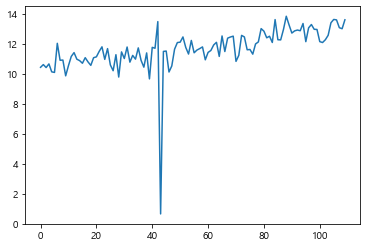

In [404]:
import matplotlib.pyplot as plt

plt.plot(averageList)
plt.show()



In [405]:
# 1953년에 날씨데이터가 제대로 기록되지 않아 크게 그래프가 튄 모습이 보인다. 1953년의 평균기온을 그래프에서 제거하자.
# for avg in averageList:
#     if avg <1:
#         averageList.remove(avg)

# plt.plot(averageList)

# f.close()

하지만 그래프의 X좌표가 해당 년도를 나타내지 않고, 그래프에서 제외된 년도가 표시되지 않아 직관성이 떨어진다.
이를 좀더 직관적인 그래프로 수정하자. 

In [406]:
dict_avg={}
year = 1908

for index in range(len(averageList)+2): # 1951년과 52년의 데이터는 존재 x, 50년과 53년의 데이터는 부정확하므로 None으로 대체
    if year <1950: 
        dict_avg[year]= averageList[index]
        year= year+1
    
    elif year>=1950 and year <1954: 
        dict_avg[year]=None
        year=year+1
    
    else:
        dict_avg[year]=averageList[index-2] #50년과 53년의 데이터 skip
        year=year+1
    

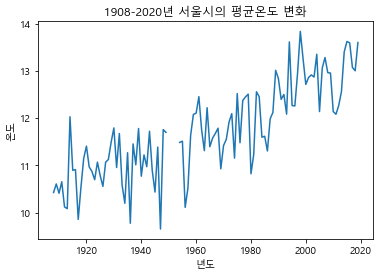

In [407]:
import matplotlib.pyplot as plt

tempList= dict_avg.items()

x ,y =zip(*tempList)


plt.rc('font',family='Malgun Gothic')
plt.title('1908-2020년 서울시의 평균온도 변화')

plt.plot(x,y)
plt.xlabel('년도')
plt.ylabel('온도')
plt.show()
